#### Q1
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the count of each genre present in IMDB movie dataset?
Print the Genre and number of movies present in that genre.

In [91]:
import pandas as pd
import sqlite3
import numpy as np

#making a connection to the database
db= sqlite3.connect("IMDB.sqlite")

# reading database as a sql query
data1=pd.read_sql_query("select * from genre",db)
data1["genre"].dropna(inplace=True)
#checking for the total sum of null/Na values
data1["genre"].isnull().sum()
#turns out it doesn't drop empty strings, so replacing it with Nan values
data1.replace("",np.NaN,inplace=True)
X=data1["genre"].value_counts()
for i in range(len(X)):
    print(X.index[i],X.values[i])

Drama 77
Adventure 43
Action 33
Comedy 31
Biography 21
Sci-Fi 18
Thriller 14
Romance 13
Animation 13
Crime 11
Mystery 7
Fantasy 7
History 6
Sport 3
Family 3
Music 3
War 2
Horror 2
Western 2
Musical 1


### Q2. Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database.
Print the rating of that movie.

In [155]:
data2= pd.read_sql_query("select * from earning left join IMDB using(Movie_id)",db)

#making a new column of net value
data2["Net"]= data2["Domestic"]+data2["Worldwide"]

#Finding the max value and then linear search to find the value
i=max(data2["Net"])
for j in range(len(data2.Net)):
    if i == data2.Net[j]:
        print(data2.Rating[j])

8.1


#### Q3. Find the most voted movie in IMDB Movie Database.Print the movie name and the rating of that movie.

In [192]:
import pandas as pd
import sqlite3
import numpy as np

#making a connection to the database
db= sqlite3.connect("IMDB.sqlite")

data3=pd.read_sql_query("select * from IMDB",db)

X=data3[data3.TotalVotes==max(data3.TotalVotes)][["Title","Rating"]]

print(X.loc[45,"Title"],X.loc[45,"Rating"])

Inception (2010) 8.8


### Q4 Find the Movie with Longest-Running Time from IMDB Movie database.
Print the name of movie and running time as integer value.

In [260]:
import pandas as pd
import sqlite3
import numpy as np

#making a connection to the database
db= sqlite3.connect("IMDB.sqlite")
data4=pd.read_sql_query("select * from IMDB",db)


#extracting the minutes and then converting that into float and then integer
def minutes(input_runtime):
    return input_runtime.strip().split(" ")[0]

data4["Runtime"]=data4["Runtime"].apply(minutes)
data4["Runtime"].replace("",np.NaN,inplace=True)
data4["Runtime"].astype(float)
data4.dropna(inplace=True,subset=['Runtime'])
data4["Runtime"]=data4["Runtime"].astype(int)
#returns an object so getting t
data4=data4[data4["Runtime"]==max(data4["Runtime"])]
print(data4["Title"].values[0],data4["Runtime"].values[0])

The Wolf of Wall Street (2013) 180


#### Q5.Find the movie which has maximum net profit in IMDB Movie Database.
Print the movie name.
Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget  

In [276]:
import pandas as pd
import sqlite3
import numpy as np

#making a connection to the database
db= sqlite3.connect("IMDB.sqlite")
data5= pd.read_sql_query("select * from earning left join IMDB using(Movie_id)",db)

#making a new column of net value
data5["Net"]= data5["Domestic"]+data5["Worldwide"]
data5["Budget"].replace("",np.NaN,inplace=True)
data5["Budget"].astype(float)
data5["Profit"]=data5["Net"]-data5["Budget"]
data5["Profit"]
#Finding the max value and then linear search to find the value
i=max(data5["Profit"])
for j in range(len(data5.Net)):
    if i == data5.Profit[j]:
        print(data5["Title"][j])

Star Wars: The Force Awakens (2015)


#### q6. Find the least budgeted movie in IMDB Movie Database.
If there is more than one least budgeted movies then print the movie which has maximum net profit.

In [294]:
import pandas as pd
import sqlite3
import numpy as np

#making a connection to the database
db= sqlite3.connect("IMDB.sqlite")
data5= pd.read_sql_query("select * from earning left join IMDB using(Movie_id)",db)

#making a new column of net value
data5["Net"]= data5["Domestic"]+data5["Worldwide"]
data5["Budget"].replace("",np.NaN,inplace=True)
data5["Budget"].astype(float)
data5["Profit"]=data5["Net"]-data5["Budget"]
data5["Profit"]
#Finding the max value and then linear search to find the value
i=min(data5["Budget"])
minimum=0
for j in range(len(data5.Net)):
    if i == data5.Budget[j] and data5["Profit"][j]>0:
        maximum= data5["Profit"][j]
        print(data5["Title"][j],data5["Profit"][j])
        

Short Term 12 (2013) 1026200.0


#### Q7 Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database year wise.
Print the Year and name of the movie which was the highest grosser in that year.
Note:Print the year in ascending order.

In [480]:
import pandas as pd
import numpy as np
import sqlite3

db=sqlite3.connect("IMDB.sqlite")

data7=pd.read_sql_query("select * from IMDB left join earning using (Movie_id)",db)

data7["Net"]= data7["Domestic"]+data7["Worldwide"]

#extracting the year using list comprehension by converting 
def year_extracted(title):
    return int(title.strip().split(" ")[-1][-5:-1])
def movie_title(title):
    return title.strip().split(" ")

data7["Year"] = data7["Title"].apply(year_extracted)
data7["Year"].unique()

X=data7.groupby("Year")["Net"].max()
X.values
d={}
for i in range(len(data7["Net"])):
    if data7["Net"][i] in (X.values):
        key=data7["Year"][i]
        value=data7["Title"][i]
        d[key]=value
        
        
# for i in range(len(X.Title)):
#     print(X["Title"].index[i],X["Title"].values[i])

for i  in sorted(d):
    print(i,d[i])

2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


#### Q8. Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off..
Note: Movies has multiple genres, so calculate the percentage for each genre.Replace empty budget column to zero.

Action 17.98
Adventure 25.10
Animation 7.66
Biography 2.59
Comedy 7.22
Crime 1.77
Drama 10.85
Family 1.91
Fantasy 4.54
History 0.72
Horror 0.03
Music 0.15
Musical 0.25
Mystery 1.95
Romance 1.12
Sci-Fi 10.77
Sport 0.46
Thriller 3.99
War 0.36
Western 0.57


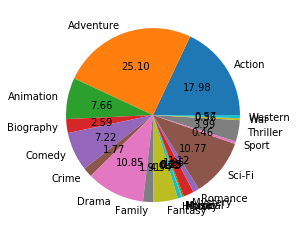

In [531]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3

db=sqlite3.connect("IMDB.sqlite")

df=pd.read_sql_query("Select * from IMDB lef join genre using(Movie_id)",db)
df.head()
df.describe()
df["Budget"].replace("",0,inplace=True)

df.Budget.unique()
df["genre"].replace('',np.NaN,inplace=True)
df.dropna(subset=["genre"],inplace=True)
grouped_sum= df.groupby("genre")["Budget"].sum()
df.dropna(subset=["genre"],inplace=True)

for i in range(len(grouped_sum)):
    percentage=grouped_sum.values[i]/(sum(grouped_sum))*100
    print(grouped_sum.index[i],format(percentage,".2f"))

plt.pie(grouped_sum,labels=grouped_sum.index,autopct="%.2f")
plt.show()

#### Q9.Find out the percentage of the total earning for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies total earning present in that genre with 2 decimal place after rounding off.
Note: Movies has multiple genres, so calculate the percentage for each genre.Total Earning=Domestic earning + WorldWide earning.

Action 17.91
Adventure 23.57
Animation 6.77
Biography 3.42
Comedy 7.69
Crime 1.55
Drama 11.96
Family 1.05
Fantasy 5.15
History 1.04
Horror 0.01
Music 0.43
Musical 0.38
Mystery 2.01
Romance 1.45
Sci-Fi 9.95
Sport 0.32
Thriller 4.42
War 0.25
Western 0.65


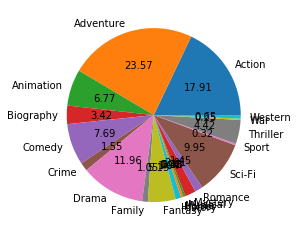

In [551]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

#making a connection to the database
db= sqlite3.connect("IMDB.sqlite")


df=pd.read_sql_query("Select * from genre left join earning using(Movie_id)",db)
df["Net"]= df["Domestic"]+df["Worldwide"]
df["Net"].unique()
df["genre"].replace("",np.NaN,inplace=True)
df.dropna(subset=["genre"],inplace=True)

grouped_sum=df.groupby("genre")["Net"].sum()

for i in range(len(grouped_sum)):
    percentage=grouped_sum.values[i]/(sum(grouped_sum))*100
    print(grouped_sum.index[i],format(percentage,".2f"))

plt.pie(grouped_sum,labels=grouped_sum.index,autopct="%.2f")
plt.show()


#### Find the movie which has genre of 'Sci-Fi' and 'Mystery' and movie rating is greater or equal to 8 from IMDB Movie Database.
Print the movie name.
Movies has multiple genre.

In [564]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

#making a connection to the database
db= sqlite3.connect("IMDB.sqlite")


df=pd.read_sql_query("Select * from IMDB left join genre using(Movie_id)",db)
df[(df["genre"]=='Sci-Fi')&(df["Rating"]>=8) | (df["genre"]=='Mystery')&(df["Rating"]>=8)]
#for i in range(len(df.Title)):
print(df.loc[19,"Title"])

Arrival (2016)
